# Decision Trees
We will use decision trees to classify if a person has breast cancer given the feature information from the cell nuclei

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
breast_cancer = pd.read_csv('../Data/breast_cancer.csv')
breast_cancer.drop(['id'], axis=1, inplace=True)
breast_cancer_dummies = pd.get_dummies(breast_cancer, columns=['diagnosis'], drop_first=True)
breast_cancer_dummies.rename(columns={'diagnosis_M': 'Malignant'}, inplace=True)
breast_cancer_dummies

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Malignant
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1


In [9]:
inputs = breast_cancer_dummies.iloc[:,:-1]
target = breast_cancer_dummies.Malignant

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size=0.2, random_state=0)

## Decision Tree Model

In [9]:
from sklearn import tree
classification_tree = tree.DecisionTreeClassifier()
classification_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [10]:
classification_tree.score(X_train, y_train)

1.0

In [11]:
classification_tree.score(X_test, y_test)

0.9122807017543859

In [12]:
classification_tree.predict([[11.42, 20.38, 77.58, 386.1, 0.14250, 0.28390, 0.24140, 0.10520, 0.2597, 0.09744, 0.4956, 1.1560, 3.445, 27.23, 0.009110, 0.074580, 0.05661, 0.018670, 0.05963, 0.009208, 14.91, 26.50, 98.87, 567.7, 0.2098, 0.8663, 0.6869, 0.25750, 0.6638, 0.17300]])

/Users/muhammedmafawalla/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([1], dtype=uint8)

## Feature Importance

In [18]:
feature_labels = inputs.columns
feature_imp = pd.Series(classification_tree.feature_importances_,index=feature_labels).sort_values(ascending=False)
feature_imp

concave points_worst       0.692835
area_worst                 0.129572
smoothness_mean            0.032602
perimeter_mean             0.028894
symmetry_mean              0.024406
texture_worst              0.018638
symmetry_se                0.016482
perimeter_worst            0.014906
concavity_worst            0.009301
perimeter_se               0.009193
concave points_mean        0.007607
texture_se                 0.006339
area_se                    0.002992
concavity_mean             0.002925
texture_mean               0.001832
smoothness_se              0.001477
radius_mean                0.000000
smoothness_worst           0.000000
symmetry_worst             0.000000
compactness_worst          0.000000
compactness_se             0.000000
radius_worst               0.000000
fractal_dimension_se       0.000000
concave points_se          0.000000
concavity_se               0.000000
radius_se                  0.000000
fractal_dimension_mean     0.000000
compactness_mean           0

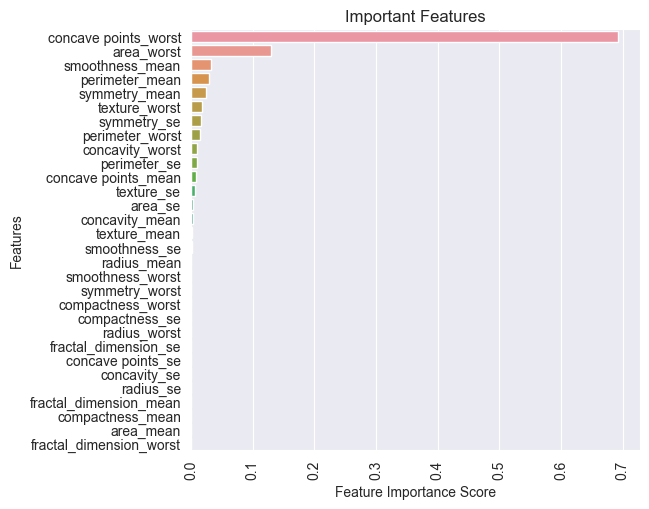

In [19]:
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xticks(rotation=90)
plt.tight_layout()
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Important Features')
plt.show()

[Text(0.6495726495726496, 0.95, 'X[27] <= 0.142\ngini = 0.462\nsamples = 455\nvalue = [290, 165]'),
 Text(0.5042735042735043, 0.85, 'X[23] <= 957.45\ngini = 0.146\nsamples = 303\nvalue = [279, 24]'),
 Text(0.4188034188034188, 0.75, 'X[22] <= 107.75\ngini = 0.073\nsamples = 288\nvalue = [277, 11]'),
 Text(0.3504273504273504, 0.65, 'X[12] <= 6.597\ngini = 0.036\nsamples = 269\nvalue = [264, 5]'),
 Text(0.3162393162393162, 0.55, 'X[6] <= 0.141\ngini = 0.029\nsamples = 268\nvalue = [264, 4]'),
 Text(0.2222222222222222, 0.45, 'X[13] <= 48.975\ngini = 0.022\nsamples = 265\nvalue = [262, 3]'),
 Text(0.13675213675213677, 0.35, 'X[14] <= 0.003\ngini = 0.015\nsamples = 262\nvalue = [260, 2]'),
 Text(0.06837606837606838, 0.25, 'X[8] <= 0.176\ngini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(0.03418803418803419, 0.15, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.10256410256410256, 0.15, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.20512820512820512, 0.25, 'X[21] <= 32.83\ngini = 0.

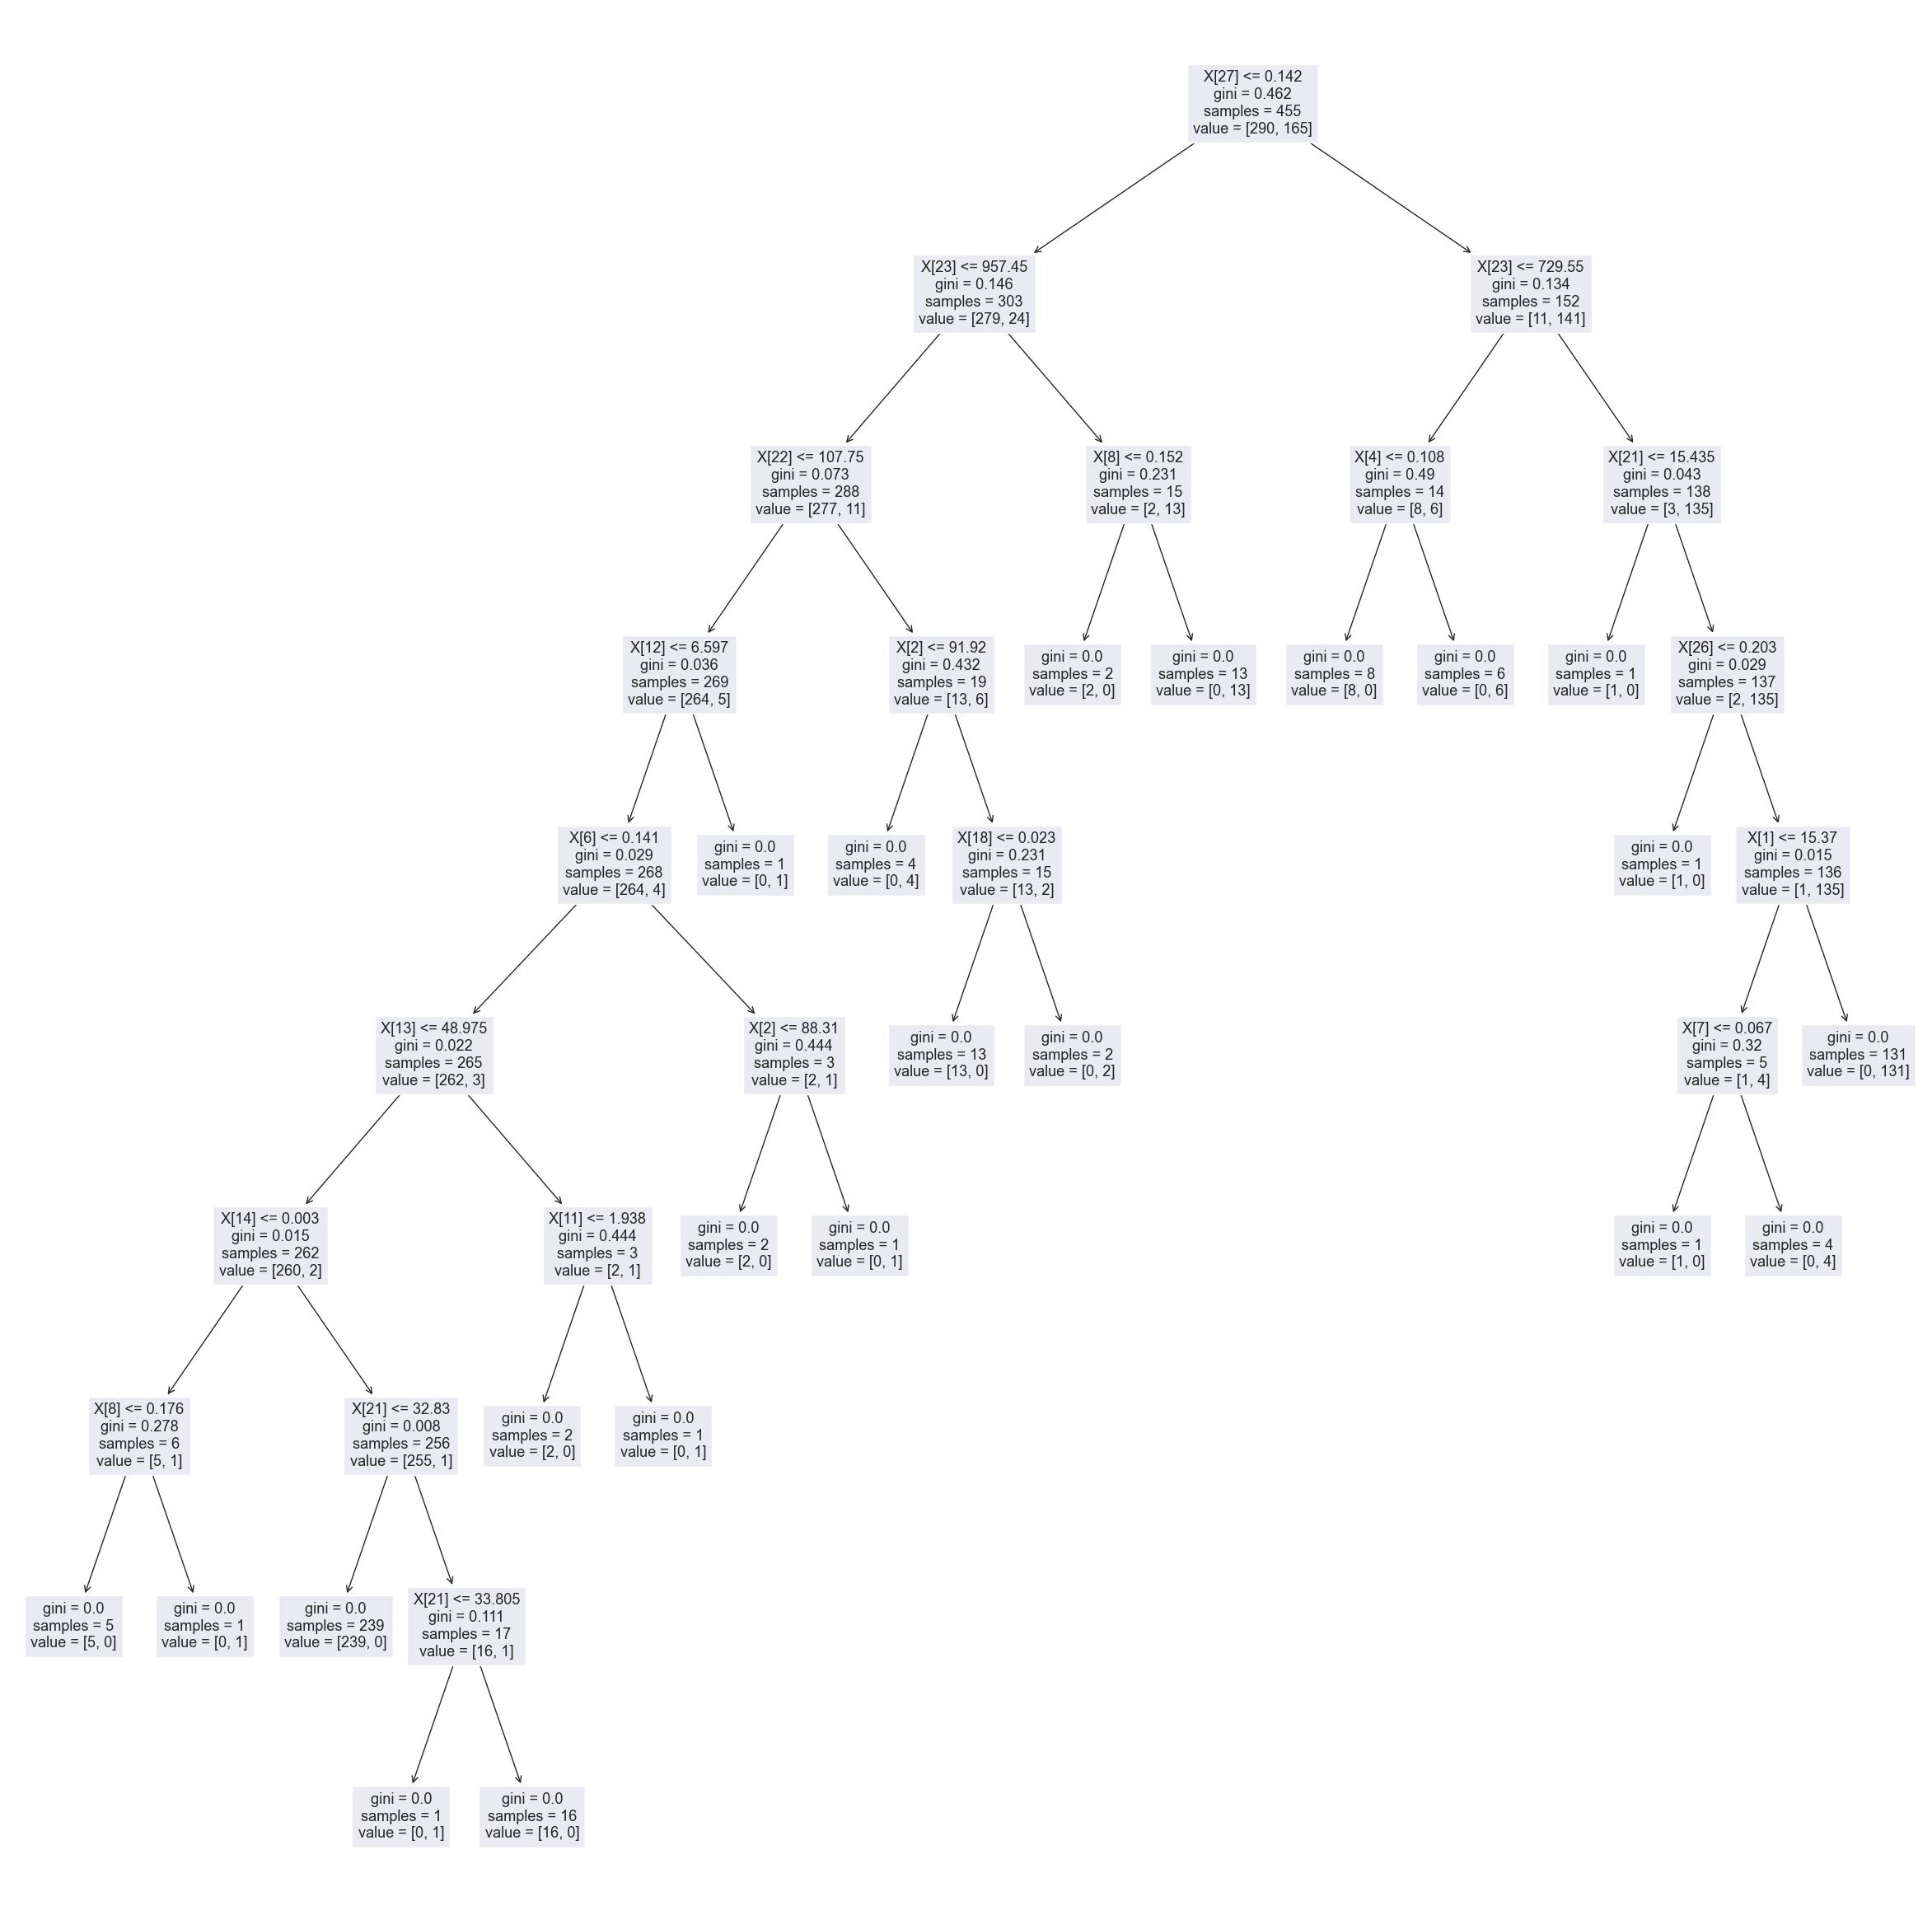

In [23]:
from sklearn.tree import plot_tree
plt.figure(figsize=(30,30))
plot_tree(classification_tree)